<a href="https://colab.research.google.com/github/srdiegorodrigues/projeto/blob/main/pesquisa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O presente trabalho visa replicar uma das etapas elaboradas na dissertação de mestrado de Tadeu Teixeira Guimarães Júnior.
O trabalho pode ser acessado em
https://recipp.ipp.pt/bitstream/10400.22/22651/1/DM_TadeuGuimaraesJunior_2022_MEI.pdf

In [250]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import io
from google.colab import files

In [251]:
#Carregar arquivos a serem analisados
url = "/content/drive/MyDrive/MESTRADO/DADOS/OCORRENCIAS/"

df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2020 = pd.read_csv(io.StringIO(open(f'{url}datatran2020.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2021 = pd.read_csv(io.StringIO(open(f'{url}datatran2021.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2022 = pd.read_csv(io.StringIO(open(f'{url}datatran2022.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2023 = pd.read_csv(io.StringIO(open(f'{url}datatran2023.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)

<ipython-input-251-c9c08b7e939a>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-251-c9c08b7e939a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-251-c9c08b7e939a>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-251-c9c08b7e939a>:6: FutureWarning: The error_bad_lines argument has been deprecated and

In [252]:
#concatenar os arquivos de análise em apenas um
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

#armazenar o cabecalho dos dados em uma variavel
colunas = df.columns

df.shape

(164946, 30)

In [253]:
df_2018.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,100027,01/01/2018,segunda-feira,06:00:00,TO,153.0,"393,1",RIO DOS BOIS,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Não Informado,0,2,0,0,1,1,0,1,2,"-9,35641407","-48,54610294",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,100044,01/01/2018,segunda-feira,08:30:00,SE,101.0,"123,4",ITAPORANGA DAJUDA,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,0,2,0,0,0,2,0,0,2,"-11,04476007","-37,36498",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,100046,01/01/2018,segunda-feira,08:50:00,TO,153.0,347,GUARAI,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Não Informado,0,2,0,0,0,2,0,0,2,"-8,952295","-48,500107",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,100052,01/01/2018,segunda-feira,05:30:00,PA,155.0,221,ELDORADO DO CARAJAS,Ingestão de Álcool,Colisão lateral,Com Vítimas Fatais,Amanhecer,Crescente,Céu Claro,Simples,Reta,0,2,1,0,0,1,0,0,2,"-6,345512","-49,389626",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,100053,01/01/2018,segunda-feira,10:25:00,BA,116.0,"289,6",TUCANO,Ultrapassagem Indevida,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,0,1,0,0,1,0,0,1,1,"-11,08661652","-38,83420181",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


In [254]:
df_2023.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,01/01/2023,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,0,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,01/01/2023,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,01/01/2023,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,0,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,01/01/2023,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,0,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,01/01/2023,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,0,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [255]:
#Verificação da presença de valores nulos nos campos

df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        266
km                        266
municipio                   0
causa_acidente              0
tipo_acidente              20
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    4
delegacia                 246
uop                       377
dtype: int64

In [256]:
#removendo os registros com presença de valores nulos em um dos atributos. pag 46
df = df.dropna()
df.shape

(164145, 30)

In [257]:
#Verificando as opções de respotas para o atributo condição_metereologica

df['condicao_metereologica'].value_counts()

Céu Claro           94252
Nublado             28473
Chuva               20005
Sol                 11912
Garoa/Chuvisco       5882
Ignorado             1906
Nevoeiro/Neblina     1422
Vento                 286
Granizo                 5
Neve                    2
Name: condicao_metereologica, dtype: int64

In [258]:
#Substituir valor Ignorado por Céu Claro e Neve por Chuva. pag 46

df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Ignorado', 'Céu Claro')
df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Neve', 'Chuva')

<ipython-input-258-5e93a9973a28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Ignorado', 'Céu Claro')


In [259]:
df['condicao_metereologica'].value_counts()

Céu Claro           96158
Nublado             28473
Chuva               20007
Sol                 11912
Garoa/Chuvisco       5882
Nevoeiro/Neblina     1422
Vento                 286
Granizo                 5
Name: condicao_metereologica, dtype: int64

In [260]:
#Remover as features que surgem como consequencia de um AT.

#remover = ['id','veiculos', 'municipio','classificacao_acidente', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos']

df_before_AT = df[['km','data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'condicao_metereologica', 'latitude', 'regional', 'delegacia', 'uop']]

df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,condicao_metereologica,latitude,regional,delegacia,uop
0,"393,1",01/01/2018,segunda-feira,06:00:00,TO,153.0,Céu Claro,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,"123,4",01/01/2018,segunda-feira,08:30:00,SE,101.0,Céu Claro,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,347,01/01/2018,segunda-feira,08:50:00,TO,153.0,Céu Claro,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,221,01/01/2018,segunda-feira,05:30:00,PA,155.0,Céu Claro,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,"289,6",01/01/2018,segunda-feira,10:25:00,BA,116.0,Sol,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


In [261]:
# #Concatenar colunas data_inversa e horario e criando a feature data_hora

# df_before_AT['data_hora'] = df.apply(lambda x: '%s.%s' % (x['data_inversa'],x['horario']), axis=1)

In [262]:
#Criação da feature chuva com base em condicao_metereologica


for indice, item in df_before_AT.iterrows():
    if item['condicao_metereologica'] in ['Chuva', 'Garoa/Chuvisco', 'Granizo']:
        df_before_AT.at[indice, 'chuva'] = 1
    else:
        df_before_AT.at[indice, 'chuva'] = 0

df_before_AT['chuva'].value_counts()

<ipython-input-262-765d1dbb0ecf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_AT.at[indice, 'chuva'] = 0


0.0    138251
1.0     25894
Name: chuva, dtype: int64

In [263]:
#apagar a coluna condicao_metereologica

df_before_AT = df_before_AT.drop('condicao_metereologica', axis=1)



In [264]:
df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,latitude,regional,delegacia,uop,chuva
0,"393,1",01/01/2018,segunda-feira,06:00:00,TO,153.0,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0
1,"123,4",01/01/2018,segunda-feira,08:30:00,SE,101.0,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE,0.0
2,347,01/01/2018,segunda-feira,08:50:00,TO,153.0,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0
3,221,01/01/2018,segunda-feira,05:30:00,PA,155.0,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA,0.0
4,"289,6",01/01/2018,segunda-feira,10:25:00,BA,116.0,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA,0.0


#Análise exploratória de dados

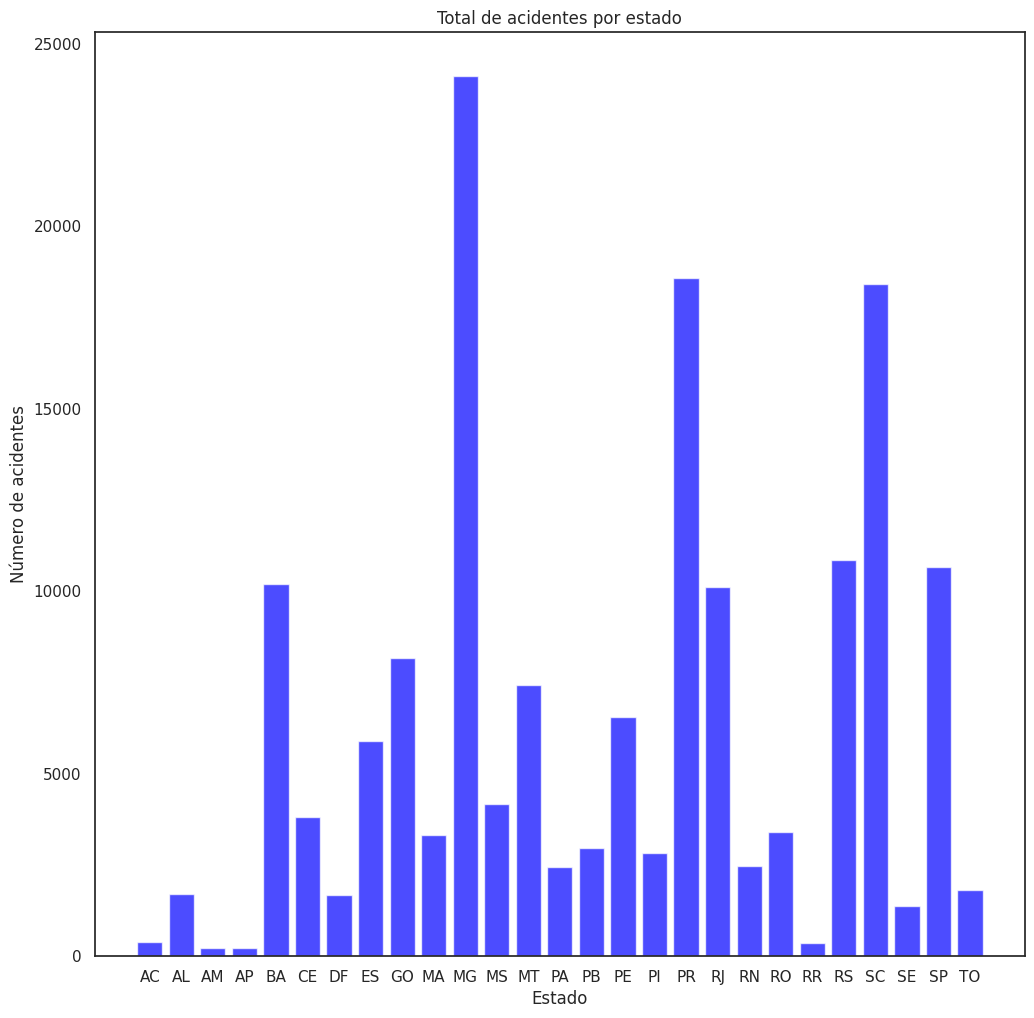

In [265]:
#Acidentes por estado
import matplotlib.pyplot as plt

# Agrupar os dados por estado e contar o número de ocorrências de acidentes para cada estado
resultados = df.groupby('uf').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(resultados['uf'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Estado')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por estado')
plt.show()


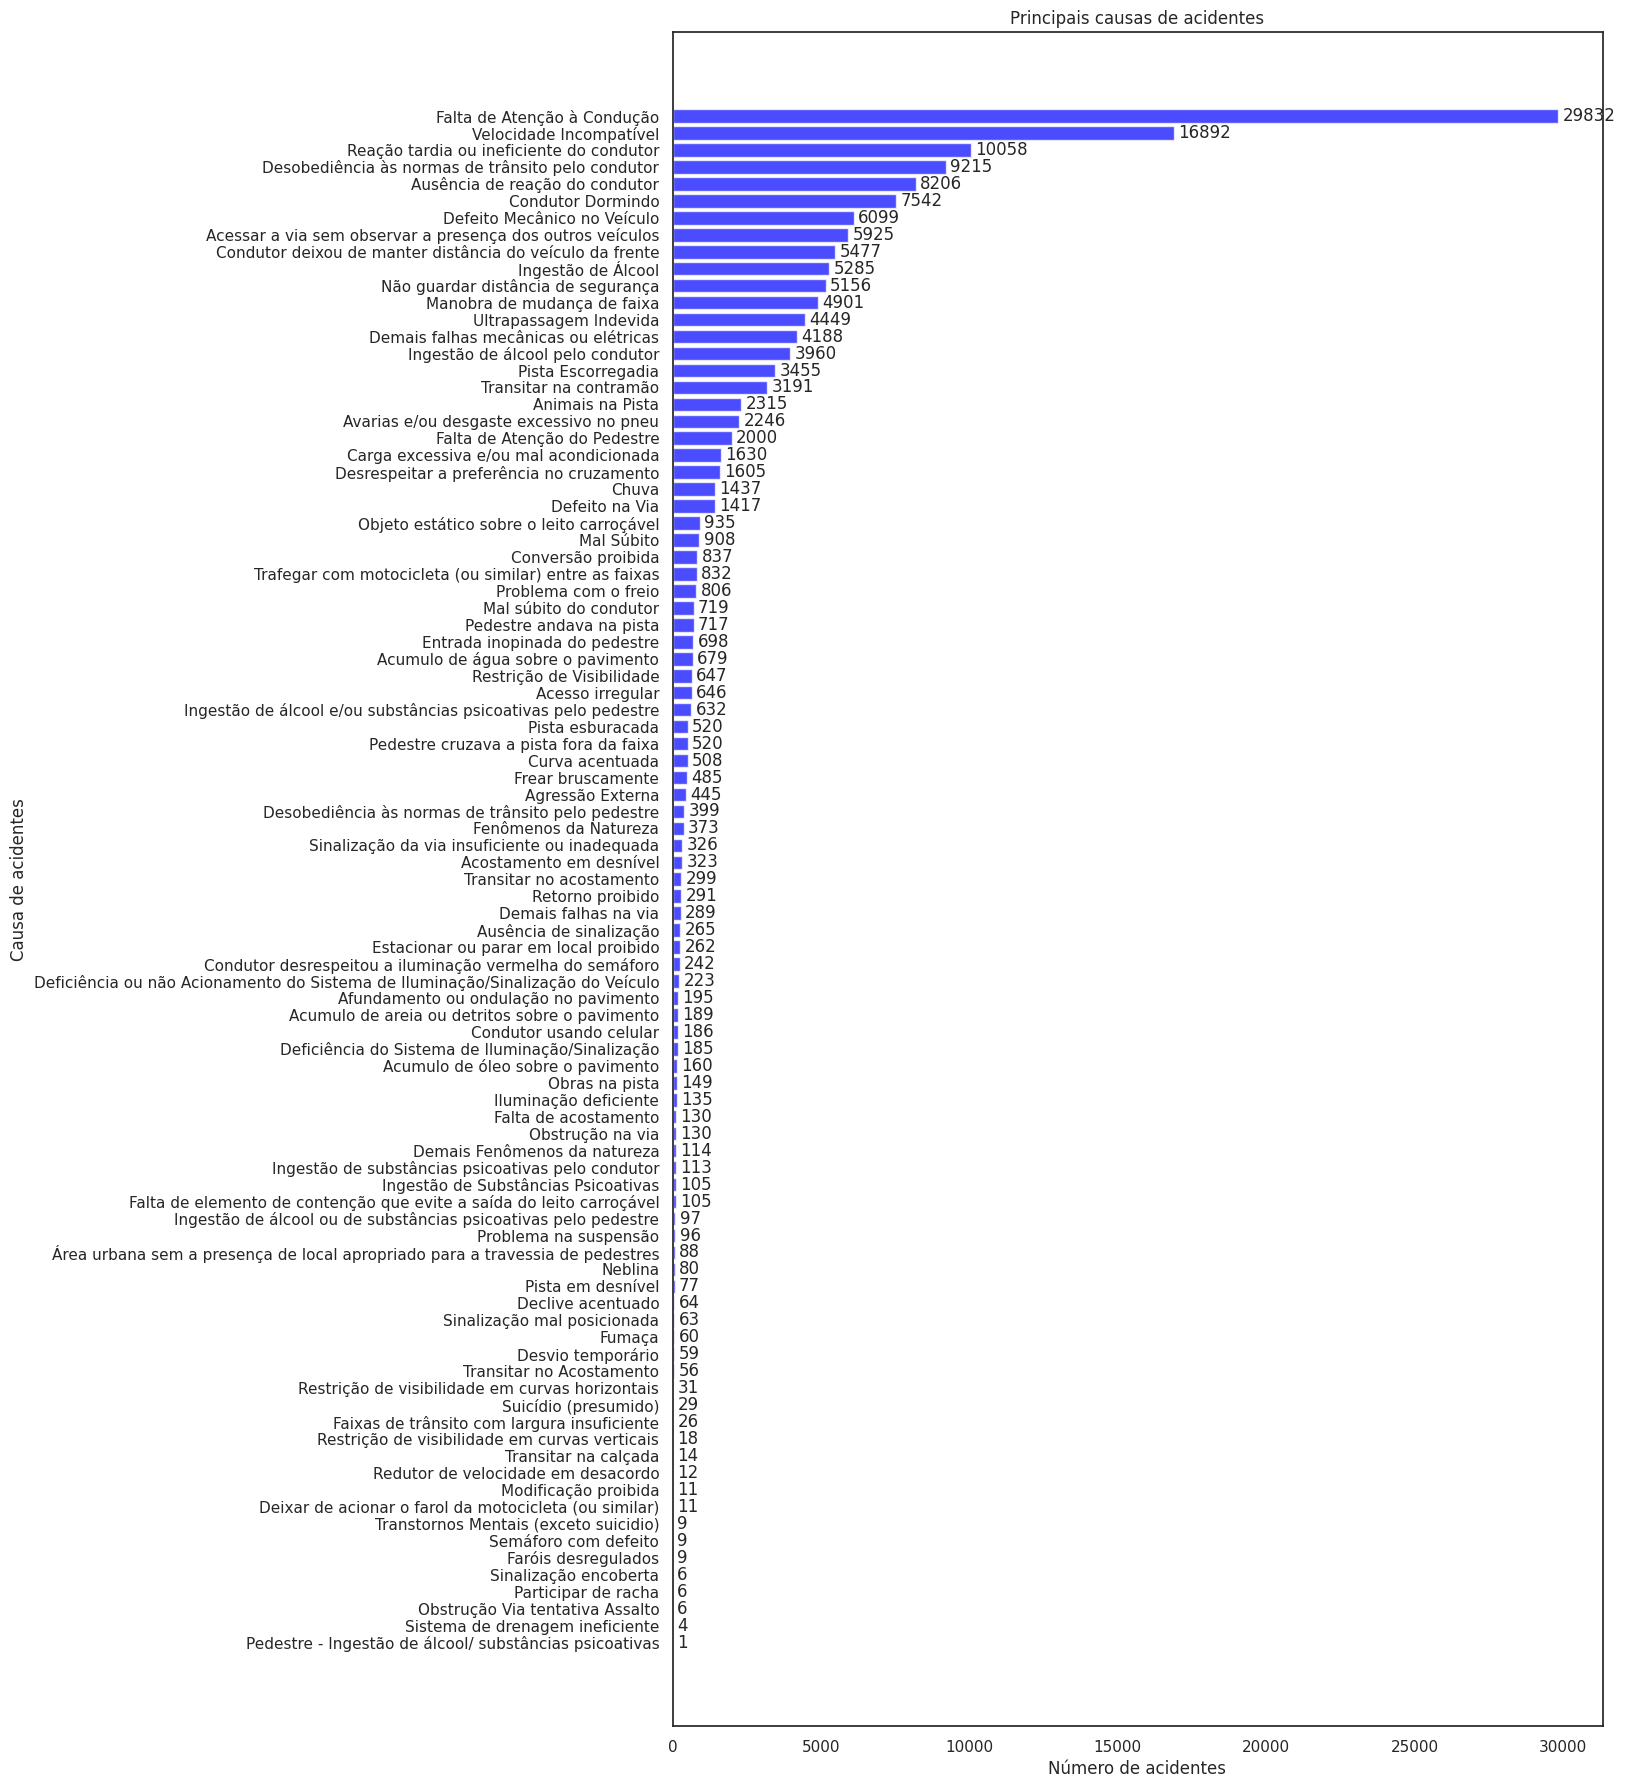

In [266]:
#Principais causas de acidentes

resultados = df.groupby('causa_acidente').size().reset_index(name='numero_acidentes')
resultados = resultados.sort_values(by='numero_acidentes', ascending=True)  # Mudança aqui
fig, ax = plt.subplots(figsize=(12, 22))
bars = ax.barh(resultados['causa_acidente'], resultados['numero_acidentes'], color='blue', alpha=0.7)  # Mudança aqui
ax.set_xlabel('Número de acidentes')  # Mudança aqui
ax.set_ylabel('Causa de acidentes')  # Mudança aqui
ax.set_title('Principais causas de acidentes')

# Adicionar o número de acidentes ao lado de cada barra
for bar in bars:
    width = bar.get_width()  # Mudança aqui
    ax.annotate('{}'.format(width),  # Mudança aqui
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

plt.show()

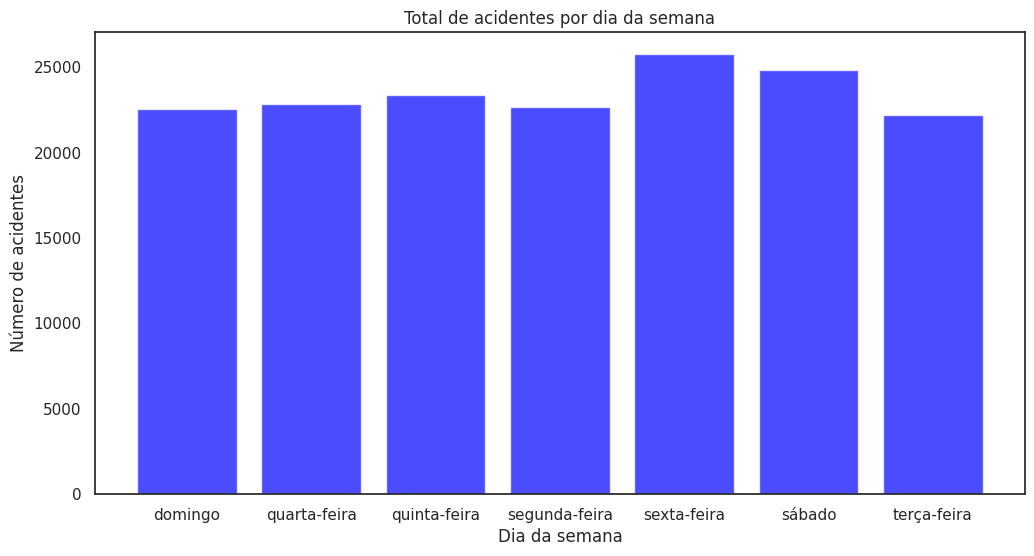

In [267]:
#Acidentes por Semana
# Agrupar os dados por dia da semana e contar o número de ocorrências de acidentes

resultados = df.groupby('dia_semana').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(resultados['dia_semana'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por dia da semana')


plt.show()

In [268]:
# Extrair apenas o campo dia da feature data_inversa

df_before_AT['dia'] = df_before_AT['data_inversa'].str.split('/').str[0]
df_before_AT['dia'] = list(map(int, df_before_AT['dia']))

# Extrair apenas o campo mês da feature data_inversa
df_before_AT['mes'] = df_before_AT['data_inversa'].str.split('/').str[1]
df_before_AT['mes'] = list(map(int, df_before_AT['mes']))

# Extrair apenas o campo ano da feature data_inversa
df_before_AT['ano'] = df_before_AT['data_inversa'].str.split('/').str[2]
df_before_AT['ano'] = list(map(int, df_before_AT['ano']))




In [269]:
# Função para arredondar a hora de acordo com os minutos


df_before_AT['horario'] = pd.to_datetime(df_before_AT['horario'])

def arredonda_hora(horario):
    minutos = horario.minute
    hora = horario.hour

    if minutos > 30:
        hora += 1
        if hora == 24:
            hora = 0

    return hora

# Aplicando a função para criar a nova coluna 'hora_int'
df_before_AT['hora_int'] = df_before_AT['horario'].apply(arredonda_hora)

In [270]:
## Função para concatenar hora_int com data_inversa
def concatenar_hora(data, hora):
    return f"{data} {hora:02d}:00:00"

# Aplicando a função para criar a nova coluna 'data_hora'
df_before_AT['data_hora'] = df_before_AT.apply(lambda row: concatenar_hora(row['data_inversa'], row['hora_int']), axis=1)

In [271]:
df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,latitude,regional,delegacia,uop,chuva,dia,mes,ano,hora_int,data_hora
0,"393,1",01/01/2018,segunda-feira,2024-03-01 06:00:00,TO,153.0,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0,1,1,2018,6,01/01/2018 06:00:00
1,"123,4",01/01/2018,segunda-feira,2024-03-01 08:30:00,SE,101.0,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE,0.0,1,1,2018,8,01/01/2018 08:00:00
2,347,01/01/2018,segunda-feira,2024-03-01 08:50:00,TO,153.0,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0,1,1,2018,9,01/01/2018 09:00:00
3,221,01/01/2018,segunda-feira,2024-03-01 05:30:00,PA,155.0,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA,0.0,1,1,2018,5,01/01/2018 05:00:00
4,"289,6",01/01/2018,segunda-feira,2024-03-01 10:25:00,BA,116.0,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA,0.0,1,1,2018,10,01/01/2018 10:00:00


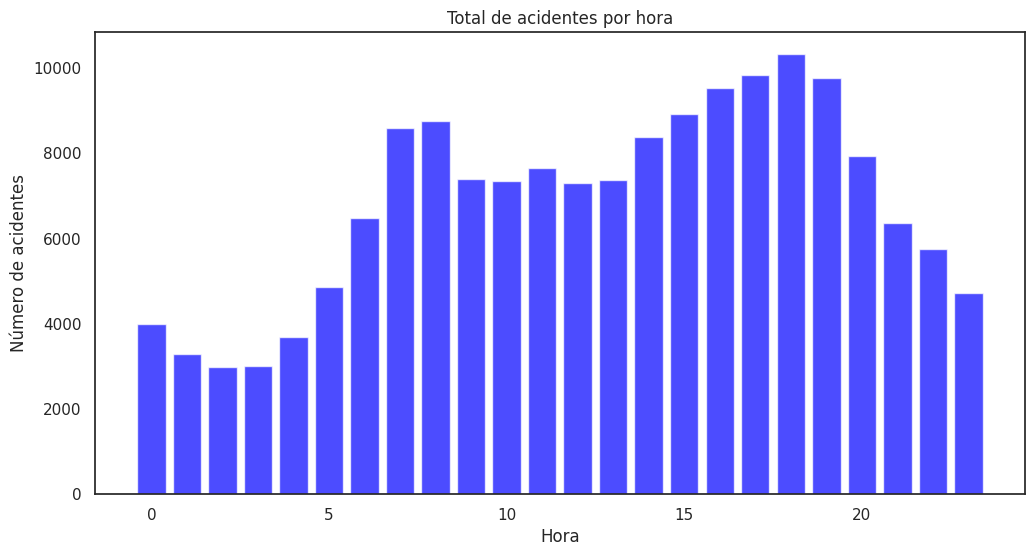

In [272]:
resultados = df_before_AT.groupby('hora_int').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(resultados['hora_int'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Hora')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por hora')
plt.show()

In [273]:
df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,latitude,regional,delegacia,uop,chuva,dia,mes,ano,hora_int,data_hora
0,"393,1",01/01/2018,segunda-feira,2024-03-01 06:00:00,TO,153.0,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0,1,1,2018,6,01/01/2018 06:00:00
1,"123,4",01/01/2018,segunda-feira,2024-03-01 08:30:00,SE,101.0,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE,0.0,1,1,2018,8,01/01/2018 08:00:00
2,347,01/01/2018,segunda-feira,2024-03-01 08:50:00,TO,153.0,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,0.0,1,1,2018,9,01/01/2018 09:00:00
3,221,01/01/2018,segunda-feira,2024-03-01 05:30:00,PA,155.0,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA,0.0,1,1,2018,5,01/01/2018 05:00:00
4,"289,6",01/01/2018,segunda-feira,2024-03-01 10:25:00,BA,116.0,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA,0.0,1,1,2018,10,01/01/2018 10:00:00


Para apresentar a matriz de correlação, o autor utilizou as seguintes features.

1. data_hora_int - é a data e hora da ocorrência de um AT de forma arredondada,
sem os minutos
2. ano
3. hora - valor arrendondado
4. mes
5. dia_semana_int
6. dia
7. feriado - é necessário verificar os feriados dos anos do estudo
8. chuva - variavel binária com valores 0 (ausência de chuva) e 1 (tempo chuvoso)

O alvo principal é tentar descobrir o km de ocorrência do acidente, sem utilizar
features que surgiram devida a sua ocorrência.

A característica data_hora_int foi criada para ser possível o treinamento dos algoritmos, pois seria impossível a utilização da característica original data_hora, que é do tipo categórica – o tipo datetime64[ns] é identificado como uma string pela maioria dos algoritmos. Se ela não fosse transformada em inteiro, seriam milhares de categorias, praticamente inviabilizando o treinamento.

Uma outra forma da feature data_hora ser utilizada no estudo seria realizando sua decomposição nas features ano, mes, dia e hora, como foi feito para a construção da Figura 21.

Mas a feature hora, que é a hora do dia que ocorreu o sinistro, tem uma característica interessante, como pode-se observar na Figura 19: ela é cíclica. Assim como as features dia_semana, mes e dia, a feature hora poderia ser representada de outra forma no conjunto de dados.

Uma forma de lidar com números inteiros que representam uma característica cíclica seria representá-los como as coordenadas x e y de um círculo. Isso significa mapear a variável cíclica em um círculo, para que o valor mais baixo da variável apareça após o seu valor mais alto. Para isso, basta calcular os componentes x e y do valor da variável usando as funções trigonométricas seno e cosseno. Assim, ao invés da feature hora se estender de 0 a 23, haverá duas novas features, hora_sin e hora_cos que vão de 0 a 1, e as duas combinadas
representam a característica cíclica desejada. Desta forma, 23:59 será representada próximo de 00:00, como deveria ser (Kaleko, 2017).



In [274]:
#Converter a feature km de string para float

df_before_AT['km'] = df_before_AT['km'].str.replace(',', '.')

df_before_AT['km'] = list(map(float, df_before_AT['km']))

In [275]:
#Setar se dia da ocorrência do acidente era feriado ou não

df_feriado = pd.read_csv("/content/drive/MyDrive/MESTRADO/DADOS/OCORRENCIAS/feriados_nacionais.csv",  encoding='ISO-8859-1', sep=";")


df_feriado.head()

,Data,Dia da Semana,Feriado
0,01/01/2017,domingo,Confraternização Universal
1,27/02/2017,segunda-feira,Carnaval
2,28/02/2017,terça-feira,Carnaval
3,01/01/2017,quarta-feira,quarta-feira de cinzas
4,14/04/2017,sexta-feira,Paixão de Cristo


In [276]:
#Criando a feature feriado com base nas portarias do governo federal
#Caso seja feriado, será atribuido o valor 1 para o registro
#caso contrário, será atribuido o valor 0

df_before_AT['data_inversa'] = pd.to_datetime(df_before_AT['data_inversa'])
df_feriado['data'] = pd.to_datetime(df_feriado['Data'])

# Criando uma nova coluna 'feriado' no DataFrame principal e inicializando com 0
df_before_AT['feriado'] = 0

# Loop for para comparar as datas e atribuir 1 se forem iguais
for index, row in df_before_AT.iterrows():
    if row['data_inversa'] in df_feriado['data'].values:
        df_before_AT.at[index, 'feriado'] = 1

<ipython-input-276-dd5b3bc2e891>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_before_AT['data_inversa'] = pd.to_datetime(df_before_AT['data_inversa'])
<ipython-input-276-dd5b3bc2e891>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_feriado['data'] = pd.to_datetime(df_feriado['Data'])


In [284]:
#Aplicando labelEncoder nas features categóricas

categorias = ['dia_semana','uf','regional','delegacia','uop', 'data_hora']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustando e transformando os dados da coluna 'data_hora'

for item in categorias:
    df_before_AT[item] = label_encoder.fit_transform(df_before_AT[item])


In [285]:
dt_before_AT = df_before_AT.drop(columns=['data_inversa','horario','latitude'])

In [286]:
dt_before_AT.head()

,km,dia_semana,uf,br,regional,delegacia,uop,chuva,dia,mes,ano,hora_int,data_hora,feriado
0,393.1,3,26,153.0,26,49,225,0.0,1,1,2018,6,6,1
1,123.4,3,24,101.0,24,47,77,0.0,1,1,2018,8,8,1
2,347.0,3,26,153.0,26,49,225,0.0,1,1,2018,9,9,1
3,221.0,3,13,155.0,13,60,90,0.0,1,1,2018,5,5,1
4,289.6,3,4,116.0,4,28,0,0.0,1,1,2018,10,10,1


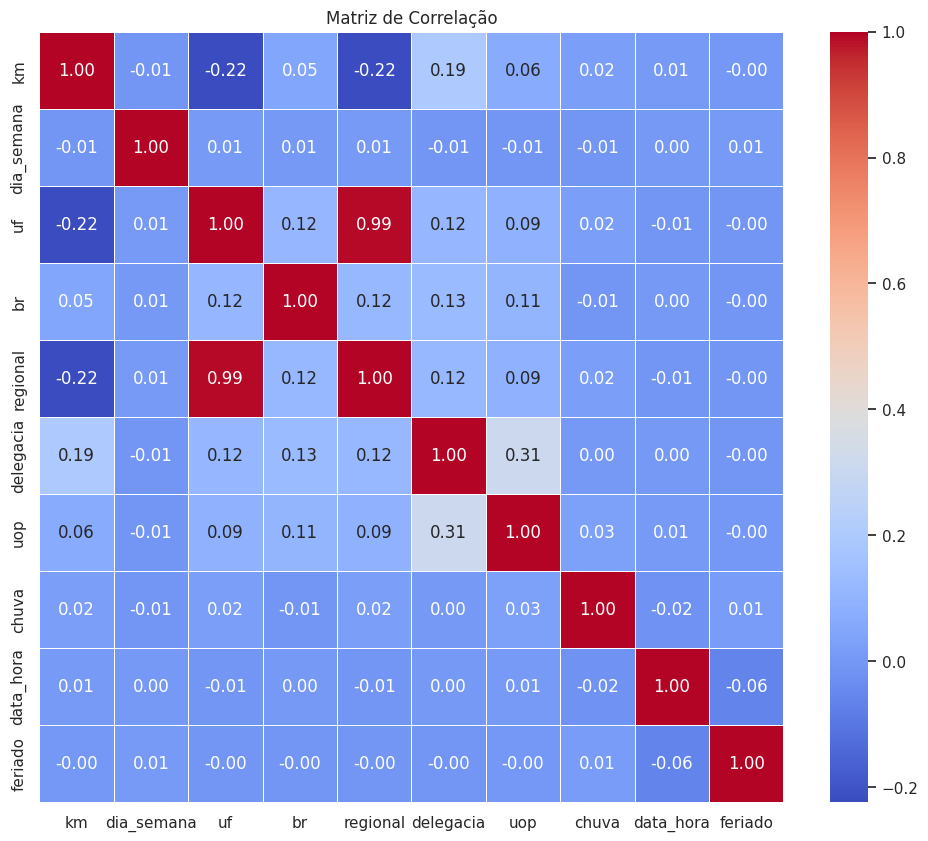

In [291]:
#Matriz de correlação
#é necessário verificar a codificação one hot enconding
import seaborn as sns

df_util = dt_before_AT[['km','dia_semana','uf','br','regional','delegacia','uop','chuva','data_hora','feriado']]

# Cria a matriz de correlação
matriz_correlacao = df_util.corr()

sns.set(style="white")

# Cria o mapa de calor (heatmap) utilizando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

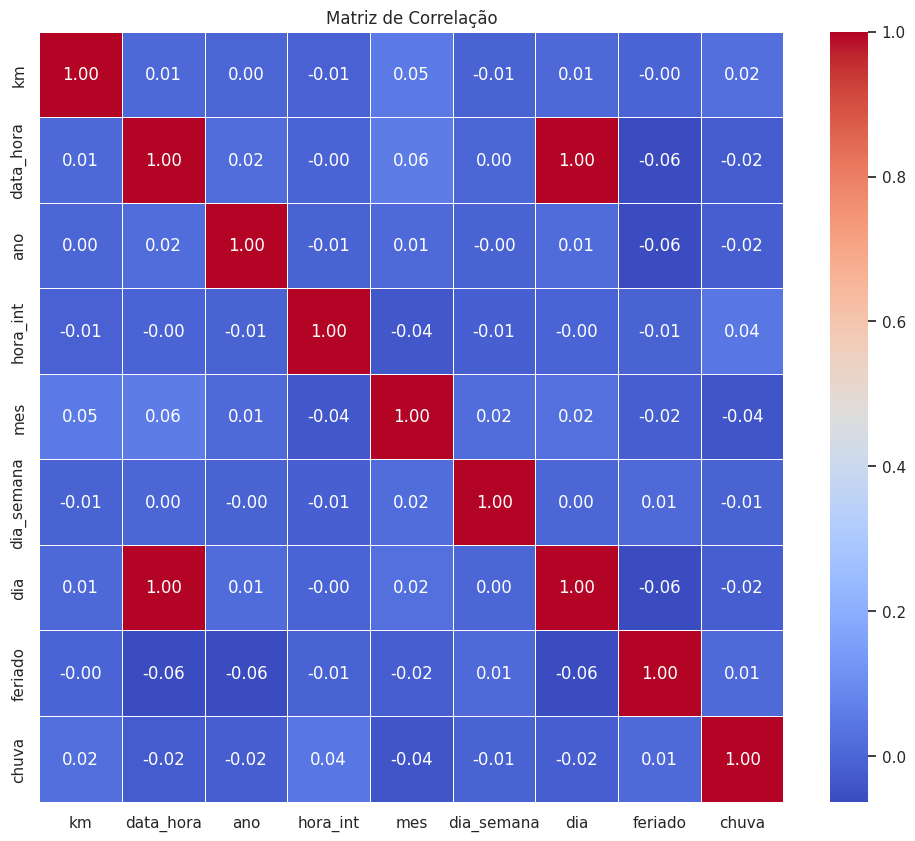

In [292]:
#Matriz de correlação
#é necessário verificar a codificação
import seaborn as sns

df_util = dt_before_AT[['km','data_hora','ano','hora_int','mes','dia_semana','dia','feriado','chuva']]

# Cria a matriz de correlação
matriz_correlacao = df_util.corr()

sns.set(style="white")

# Cria o mapa de calor (heatmap) utilizando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()